In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:13<00:00, 202MB/s]
100% 2.70G/2.70G [00:13<00:00, 207MB/s]


In [6]:
! unzip new-plant-diseases-dataset

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input , decode_predictions

In [8]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True, preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
train = train_datagen.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", 
                                          target_size=(256,256), 
                                          batch_size=32)

val = val_datagen.flow_from_directory(directory= "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", 
                                          target_size=(256,256), 
                                          batch_size=32)

Found 70295 images belonging to 38 classes.
Found 70295 images belonging to 38 classes.


In [10]:
t_img, label = train.next()
t_img.shape

(32, 256, 256, 3)

In [11]:
def plotImage(img_arr, label):
  for im , l in zip(img_arr , label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


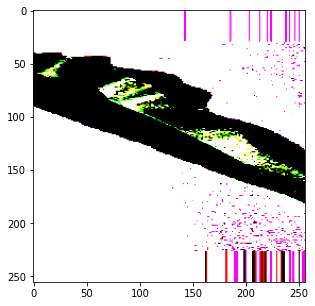

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


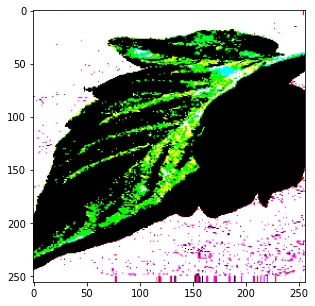

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


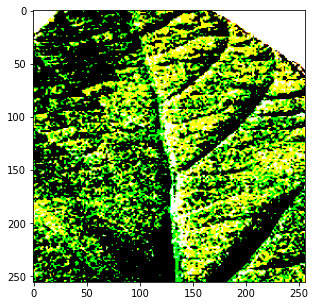

In [12]:
plotImage(t_img[:3], label)

# Building our model

In [13]:
from keras.layers import Dense, Flatten
from keras.applications.vgg19 import VGG19
from tensorflow import keras

In [14]:
base_model = VGG19(input_shape=(256, 256, 3), include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [15]:
for layer in base_model.layers:
  layer.trainable = False

In [16]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [17]:
from tensorflow.keras.models import Model
X = Flatten()(base_model.output)
X = Dense(units= 38, activation='softmax')(X)

#Creating our model
model = Model(base_model.input, X)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [19]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Early Stopping and Model Check point


In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience=3, verbose=1)

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", 
                     monitor= 'val_accuracy', 
                     min_delta= 0.01, 
                     patience=3, 
                     verbose=1,
                     save_best_only=True)

cb = [es, mc]

In [21]:
his = model.fit_generator(train, 
                          steps_per_epoch=16, 
                          epochs=50, 
                          verbose=1, 
                          callbacks=cb, 
                          validation_data=val,
                          validation_steps=16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 29.4245 - accuracy: 0.1387
Epoch 1: val_accuracy improved from -inf to 0.40234, saving model to best_model.h5
16/16 [==============================] - 26s 785ms/step - loss: 29.4245 - accuracy: 0.1387 - val_loss: 12.2577 - val_accuracy: 0.4023
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 17.2216 - accuracy: 0.3730
Epoch 2: val_accuracy improved from 0.40234 to 0.57422, saving model to best_model.h5
16/16 [==============================] - 14s 897ms/step - loss: 17.2216 - accuracy: 0.3730 - val_loss: 11.5500 - val_accuracy: 0.5742
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 12.2019 - accuracy: 0.5156
Epoch 3: val_accuracy improved from 0.57422 to 0.64453, saving model to best_model.h5
16/16 [==============================] - 14s 909ms/step - loss: 12.2019 - accuracy: 0.5156 - val_loss: 10.1298 - val_accuracy: 0.6445
Epoch 4/50
16/16 [==============================] - ETA: 0

In [22]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

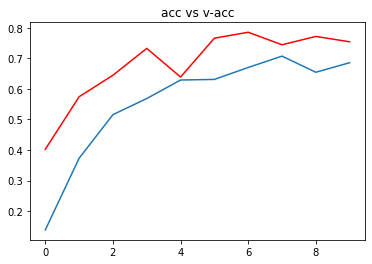

In [23]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c='red')
plt.title('acc vs v-acc')
plt.show()

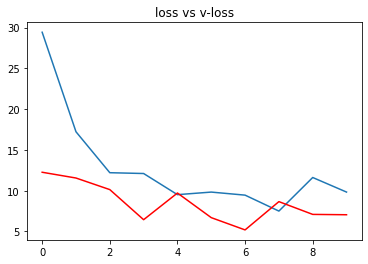

In [24]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs v-loss')
plt.show()

In [25]:
# load best model
from keras.models import load_model

model = load_model("/content/best_model.h5")


In [26]:
acc = model.evaluate_generator(val)[1]

print(f"The accuracy of your model is {acc*100}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of your model is 76.39518976211548%


In [27]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [28]:
def prediction(path):
  img = load_img(path, target_size=[256, 256])
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis=0)
  print(img.shape)
  pred = np.argmax(model.predict(img))
  print(f"The image belongs to {ref[pred]}")

In [29]:
#@title PLANT DISEASE DETECTION(image recognition)
path = '/content/test/test/CornCommonRust2.JPG' #@param {type:"string"}
prediction(path)

(1, 256, 256, 3)
The image belongs to Corn_(maize)___Common_rust_
